<a href="https://colab.research.google.com/github/hemantkumar0077/Iris-Classification/blob/main/iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 32px;">  Iris Classification</h1>
</div>


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    LIBRARY IMPORTS
</div>


In [95]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LassoCV

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    LOAD DATA
</div>

In [96]:
google_drive_link = "https://drive.google.com/file/d/1EdRPWNNhtNpy_Aaz0KSji_dyYCO9B323/view?usp=sharing"

file_id = google_drive_link.split("/")[-2]

download_link = f"https://drive.google.com/uc?id={file_id}"

# Read CSV into Pandas DataFrame
df = pd.read_csv(download_link)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Handling missing Duplicated data
</div>

In [98]:
df.isnull().sum()

5.1            0
3.5            0
1.4            0
0.2            0
Iris-setosa    0
dtype: int64

<!-- # Fill missing processor_type with 'unknown' -->

In [99]:
df.columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"]
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# Drop the duplicated data

In [100]:
df.duplicated().sum()

3

In [101]:
df.shape

(149, 5)

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Statastical Summary
</div>

In [102]:
numerical_summary = df.describe().transpose()
palette = sns.color_palette("viridis", as_cmap=True)
numerical_summary.style.background_gradient(cmap=palette)

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,149.000000,5.848322,0.828594,4.300000,5.100000,5.800000,6.400000,7.900000
SepalWidthCm,149.000000,3.051007,0.433499,2.000000,2.800000,3.000000,3.300000,4.400000
PetalLengthCm,149.000000,3.774497,1.759651,1.000000,1.600000,4.400000,5.100000,6.900000
PetalWidthCm,149.000000,1.205369,0.761292,0.100000,0.300000,1.300000,1.800000,2.500000


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    EDA & Data visualization
</div>

## Pairwise correlation heatmap

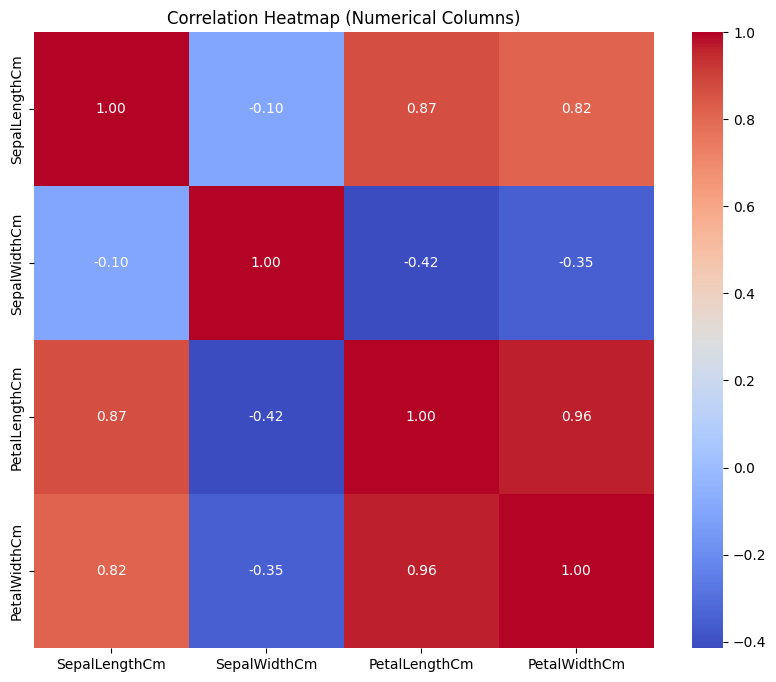

In [103]:
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_df = df[numerical_columns]
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()

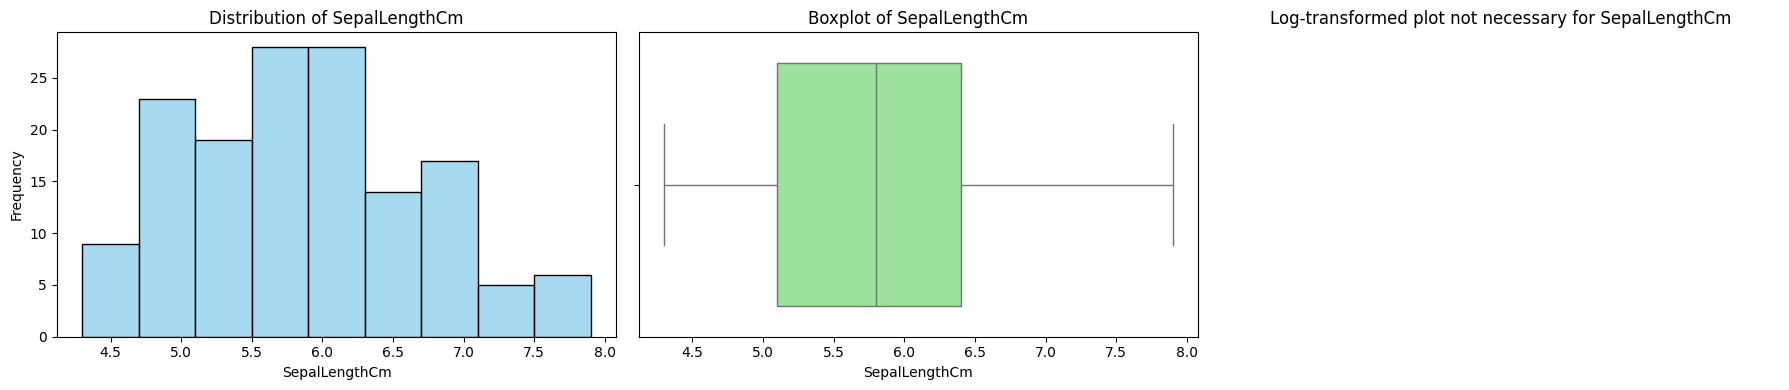

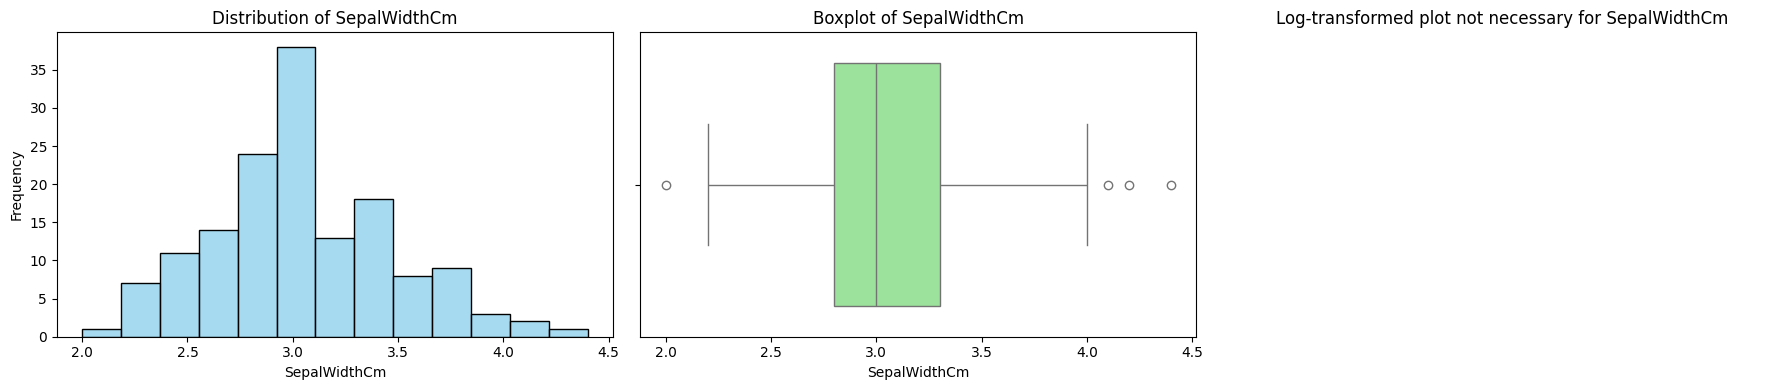

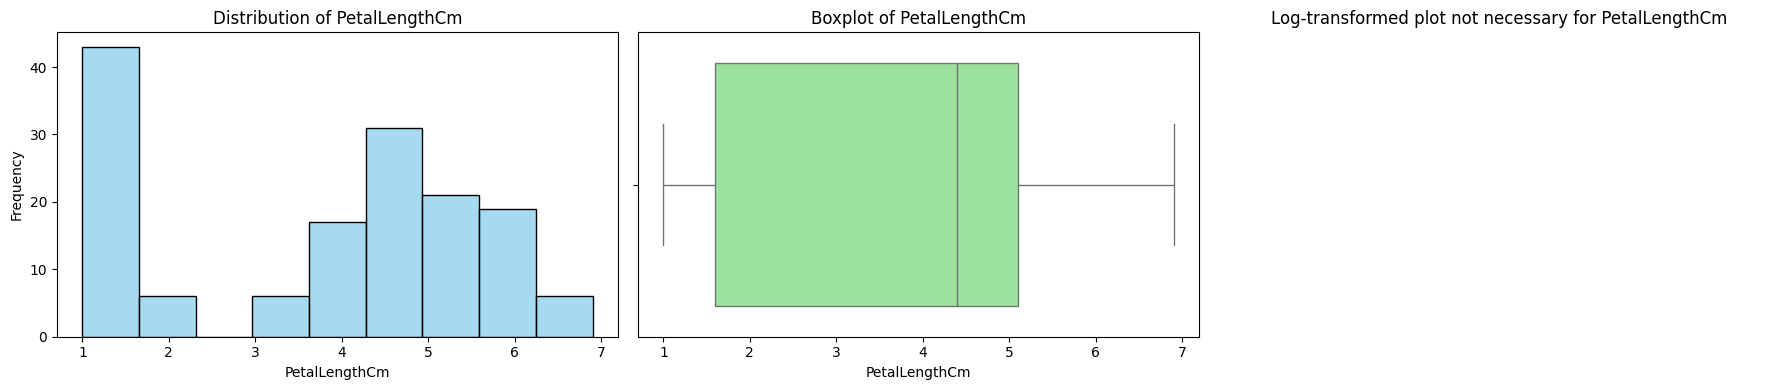

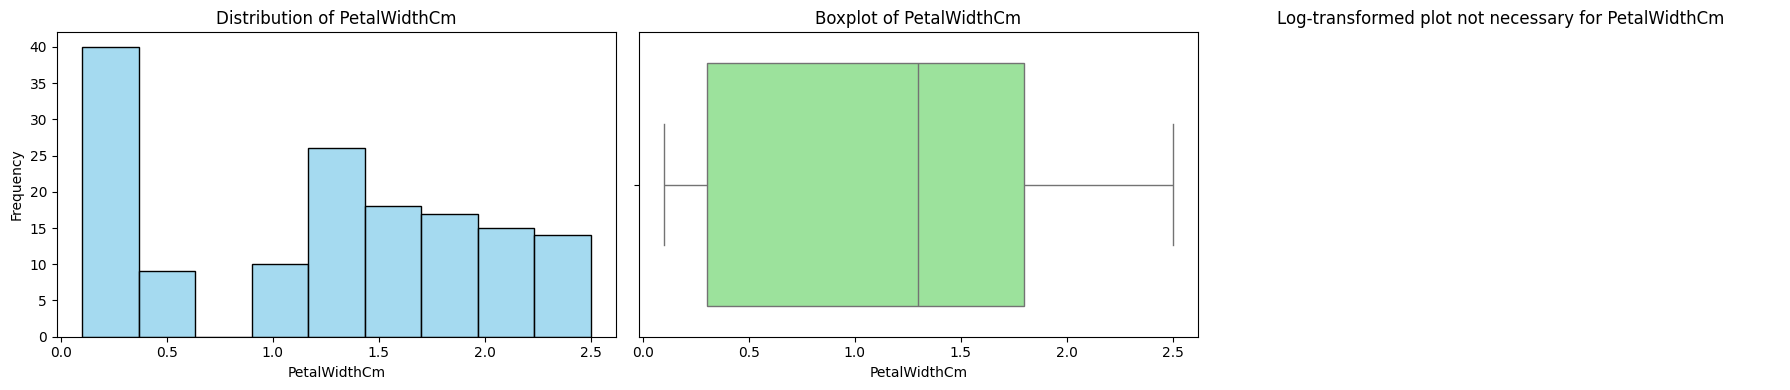

In [104]:
for column in numerical_columns:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))
    sns.histplot(df[column], kde=False, color='skyblue', ax=ax1)
    ax1.set_title(f'Distribution of {column}')
    ax1.set_ylabel('Frequency')
    sns.boxplot(x=df[column], color='lightgreen', ax=ax2)
    ax2.set_title(f'Boxplot of {column}')
    if df[column].skew() > 1:
        df[column+'_log'] = np.log1p(df[column])
        sns.histplot(df[column+'_log'], kde=False, color='orange', ax=ax3)
        ax3.set_title(f'Log-transformed Distribution of {column}')
    else:
        ax3.set_title(f'Log-transformed plot not necessary for {column}')
        ax3.axis('off')

    plt.tight_layout()
    plt.show()

## scatter and pair plots

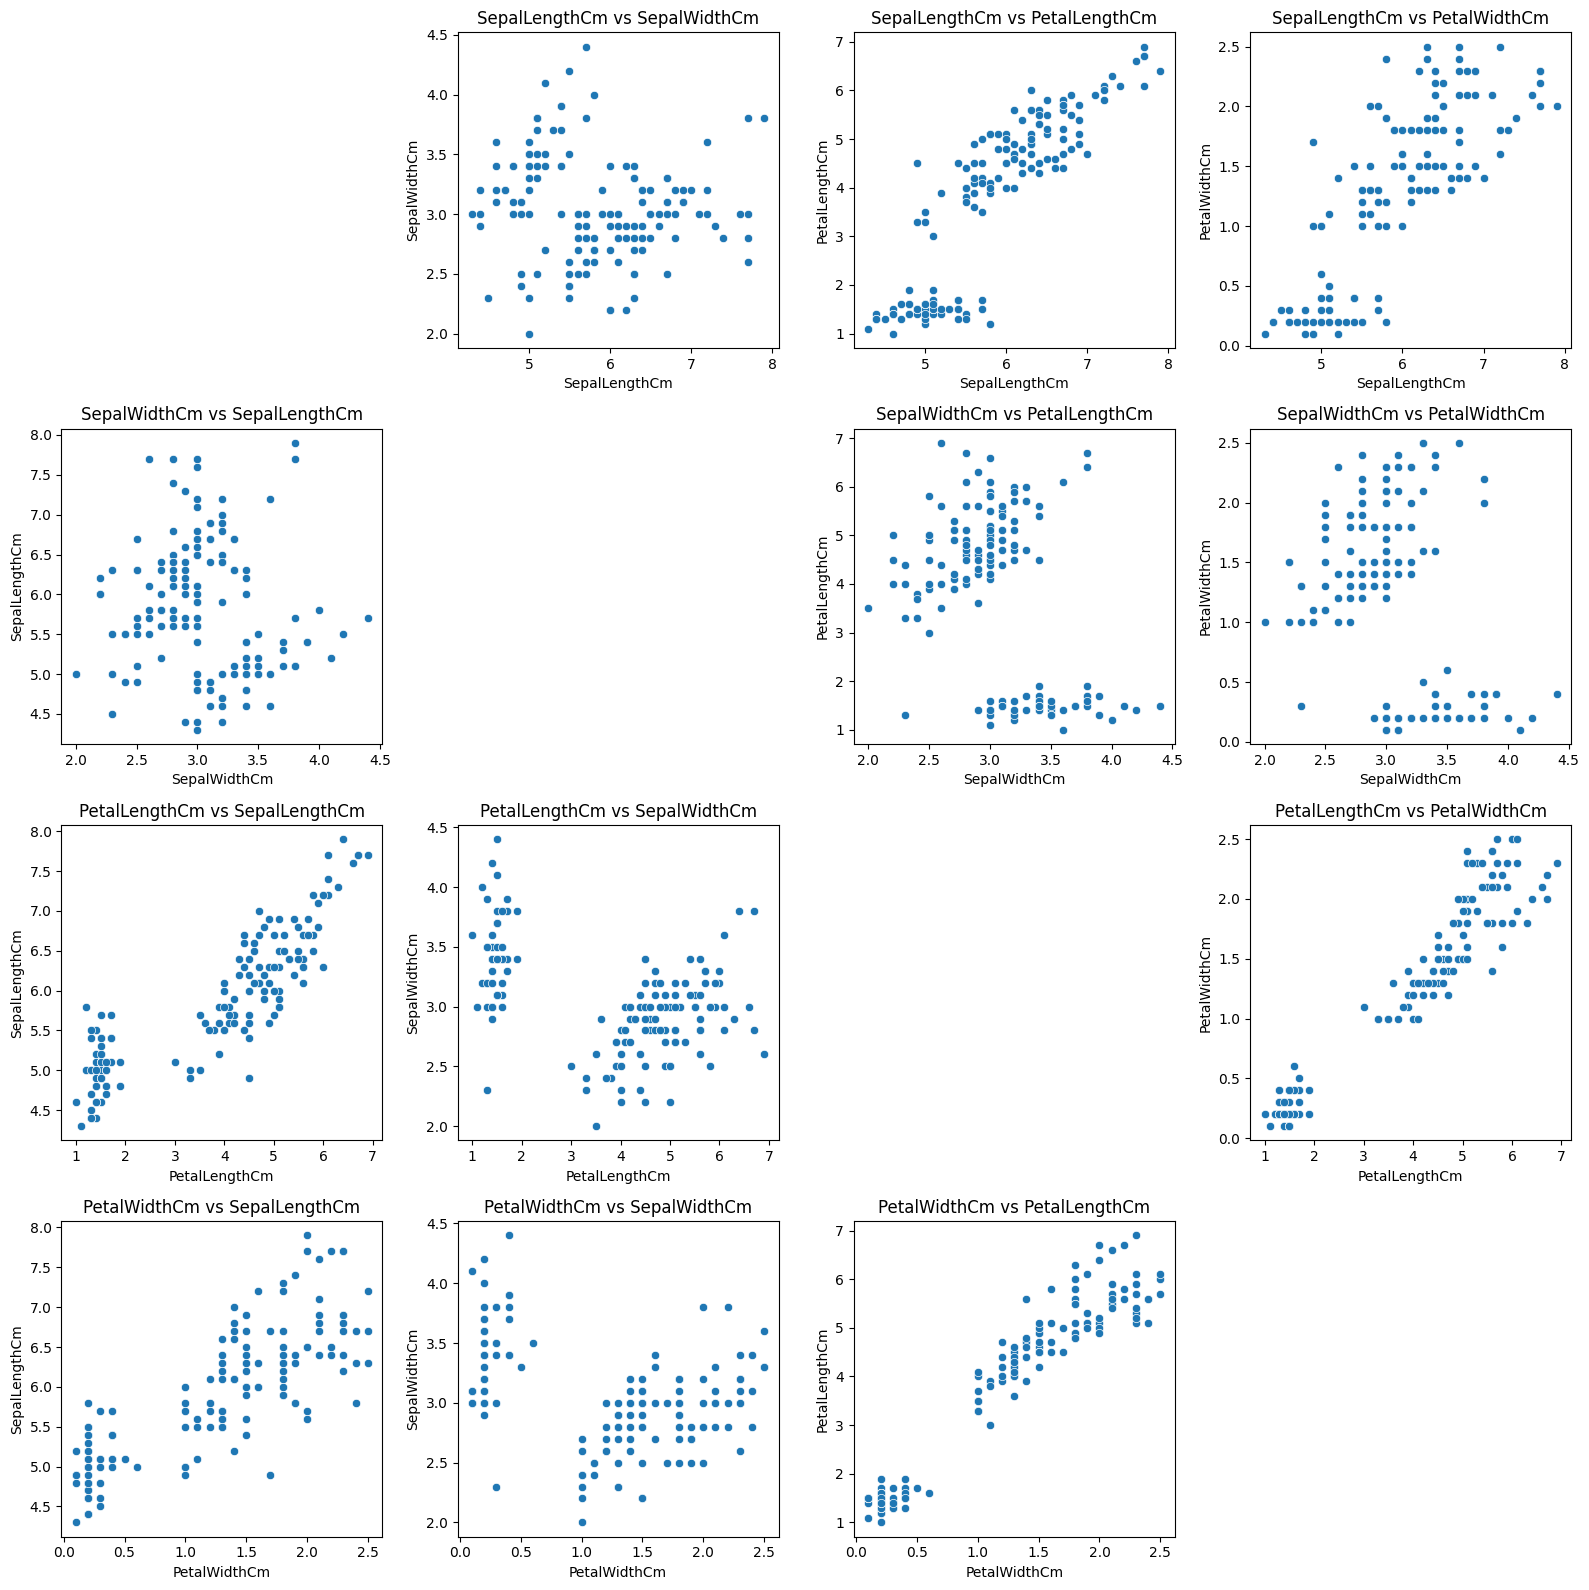

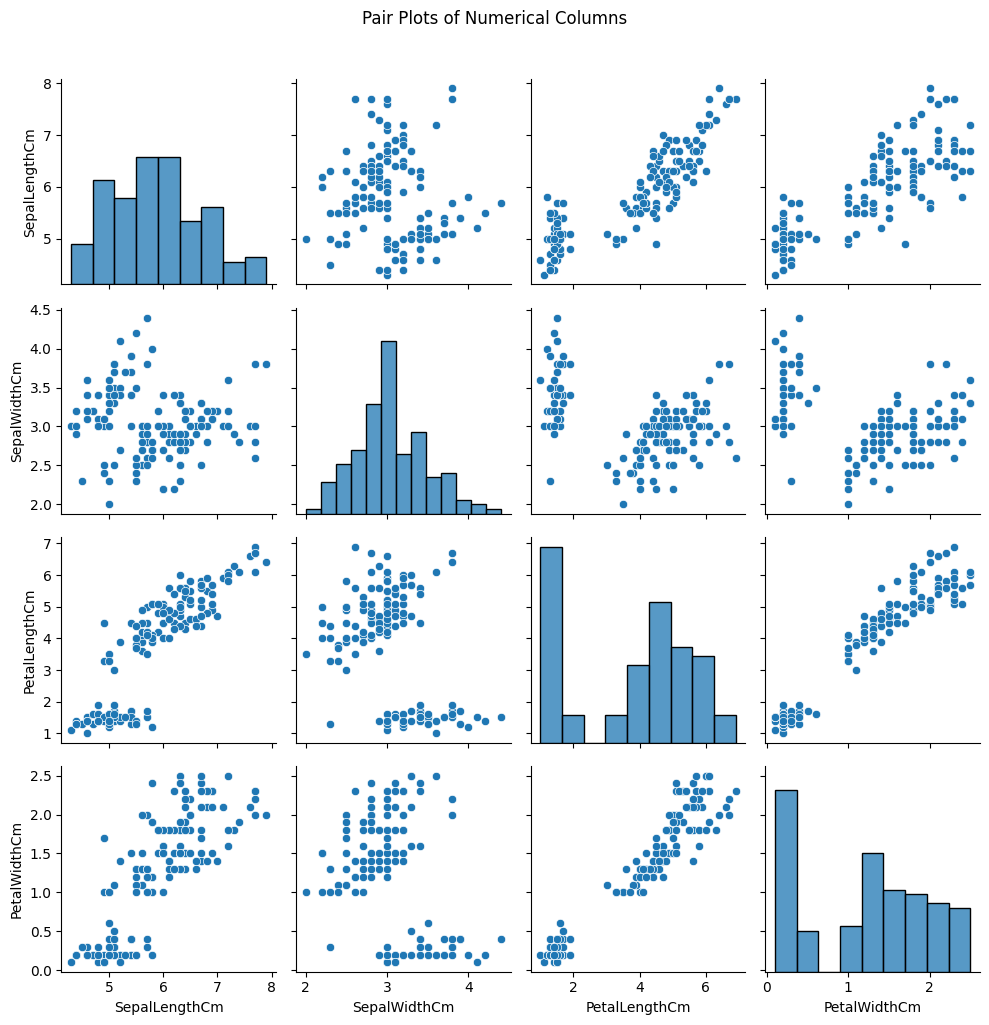

In [105]:
def scatter_plots(df, numerical_columns):
    num_cols = len(numerical_columns)
    fig, axes = plt.subplots(num_cols, num_cols, figsize=(16, 16))
    for i in range(num_cols):
        for j in range(num_cols):
            if i != j:
                sns.scatterplot(ax=axes[i, j], x=df[numerical_columns[i]], y=df[numerical_columns[j]])
                axes[i, j].set_title(f'{numerical_columns[i]} vs {numerical_columns[j]}')
                axes[i, j].set_xlabel(numerical_columns[i])
                axes[i, j].set_ylabel(numerical_columns[j])
            else:
                axes[i, j].axis('off')
    plt.tight_layout()
    plt.show()
def pair_plots(df, numerical_columns):
    pair_plot = sns.pairplot(df[numerical_columns])
    pair_plot.fig.suptitle('Pair Plots of Numerical Columns', y=1.02)
    plt.tight_layout()
    plt.show()
scatter_plots(df, numerical_columns)
pair_plots(df, numerical_columns)


## Handling Outliers

<Axes: >

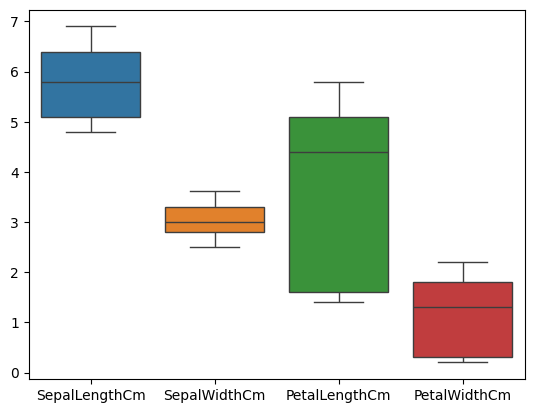

In [106]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].clip(df[numeric_columns].quantile(0.1), df[numeric_columns].quantile(0.9), axis=1)
sns.boxplot(df)

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Encoding
</div>

In [107]:
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns]

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
144,Iris-virginica
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica


In [108]:
for column in object_columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()

Unique values in 'Species':
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']



# Label encoding

In [109]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['speciesCoding'] = label_encoder.fit_transform(df[column])
df1 = df

In [110]:
df1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,speciesCoding
0,4.9,3.00,1.4,0.2,Iris-setosa,0
1,4.8,3.20,1.4,0.2,Iris-setosa,0
2,4.8,3.10,1.5,0.2,Iris-setosa,0
3,5.0,3.60,1.4,0.2,Iris-setosa,0
4,5.4,3.62,1.7,0.4,Iris-setosa,0
...,...,...,...,...,...,...
144,6.7,3.00,5.2,2.2,Iris-virginica,2
145,6.3,2.50,5.0,1.9,Iris-virginica,2
146,6.5,3.00,5.2,2.0,Iris-virginica,2
147,6.2,3.40,5.4,2.2,Iris-virginica,2


In [111]:
df1.shape

(149, 6)

In [112]:
y=df1['speciesCoding']
y

0      0
1      0
2      0
3      0
4      0
      ..
144    2
145    2
146    2
147    2
148    2
Name: speciesCoding, Length: 149, dtype: int64

In [114]:
X = df1.drop(['Species','speciesCoding'],axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  149 non-null    float64
 1   SepalWidthCm   149 non-null    float64
 2   PetalLengthCm  149 non-null    float64
 3   PetalWidthCm   149 non-null    float64
 4   Species        149 non-null    object 
 5   speciesCoding  149 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Feature Scaling
</div>

In [115]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [117]:
X

array([[-1.30132067, -0.1159394 , -1.39762561, -1.36122473],
       [-1.44254192,  0.45989295, -1.39762561, -1.36122473],
       [-1.44254192,  0.17197678, -1.33800746, -1.36122473],
       [-1.16009942,  1.61155765, -1.39762561, -1.36122473],
       [-0.59521441,  1.66914088, -1.21877115, -1.08732536],
       [-1.44254192,  1.0357253 , -1.39762561, -1.22427505],
       [-1.16009942,  1.0357253 , -1.33800746, -1.36122473],
       [-1.44254192, -0.40385557, -1.39762561, -1.36122473],
       [-1.30132067,  0.17197678, -1.33800746, -1.36122473],
       [-0.59521441,  1.66914088, -1.33800746, -1.36122473],
       [-1.44254192,  1.0357253 , -1.2783893 , -1.36122473],
       [-1.44254192, -0.1159394 , -1.39762561, -1.36122473],
       [-1.44254192, -0.1159394 , -1.39762561, -1.36122473],
       [-0.0303294 ,  1.66914088, -1.39762561, -1.36122473],
       [-0.17155065,  1.66914088, -1.33800746, -1.08732536],
       [-0.59521441,  1.66914088, -1.39762561, -1.08732536],
       [-1.01887817,  1.

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Splitting data
</div>

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
X_train

array([[-1.01887817,  0.74780912, -1.21877115, -0.95037568],
       [-0.59521441,  1.66914088, -1.39762561, -1.08732536],
       [-0.3127719 , -0.1159394 ,  0.4505372 ,  0.41912119],
       [-1.44254192, -0.1159394 , -1.39762561, -1.36122473],
       [-1.16009942,  1.32364147, -1.2783893 , -0.81342599],
       [-1.30132067, -1.55552027,  0.4505372 ,  0.69302056],
       [ 1.52310438,  0.17197678,  0.68900982,  0.41912119],
       [-0.87765691,  1.0357253 , -1.39762561, -1.36122473],
       [-0.59521441,  1.66914088, -1.21877115, -1.08732536],
       [-0.45399315,  1.66914088, -1.39762561, -1.36122473],
       [-0.3127719 , -0.69177175,  0.68900982,  1.10386962],
       [ 1.24066188,  0.17197678,  0.56977351,  0.41912119],
       [ 0.67577687, -1.55552027,  0.39091905,  0.14522182],
       [-1.01887817,  1.32364147, -1.39762561, -1.22427505],
       [-1.44254192,  1.0357253 , -1.2783893 , -1.36122473],
       [-0.0303294 , -0.97968792,  0.09282827,  0.00827213],
       [ 0.67577687, -0.

In [120]:
y_train

22     0
15     0
65     1
11     0
42     0
      ..
71     1
106    2
14     0
92     1
102    2
Name: speciesCoding, Length: 119, dtype: int64

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Training and evalution of model
</div>

<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> KNN </h1>
</div>

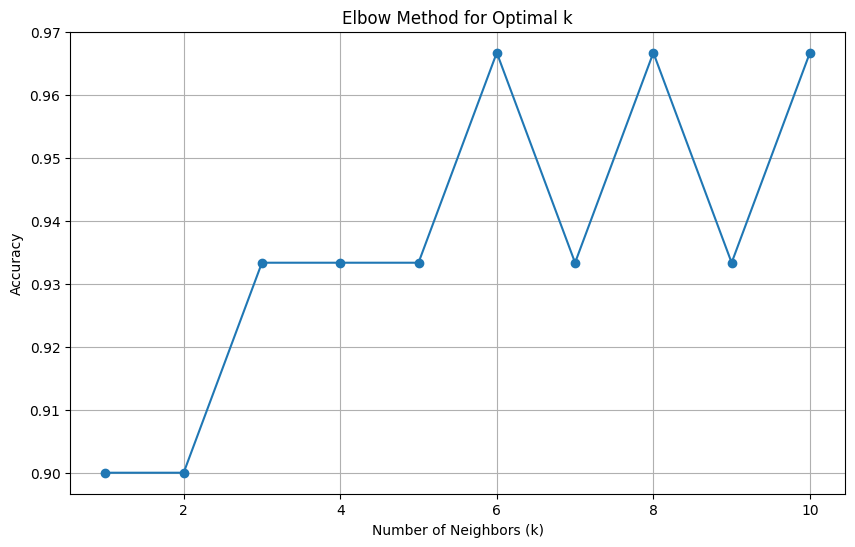

In [121]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy_values = []
max_neighbors = 10
for k in range(1, max_neighbors + 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_neighbors + 1), accuracy_values, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()



In [122]:
# Train the KNN model with the optimal k
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=3)

In [123]:
# Evaluate the model
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)



In [124]:
train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train, average='weighted')
train_recall = recall_score(y_train, y_pred_train, average='weighted')
train_f1 = f1_score(y_train, y_pred_train, average='weighted')
train_confusion = confusion_matrix(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='weighted')
test_recall = recall_score(y_test, y_pred_test, average='weighted')
test_f1 = f1_score(y_test, y_pred_test, average='weighted')
test_confusion = confusion_matrix(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Training Precision: {train_precision}")
print(f"Training Recall: {train_recall}")
print(f"Training F1 Score: {train_f1}")
print("Training Confusion Matrix:")
print(train_confusion)

print(f"\nTesting Accuracy: {test_accuracy}")
print(f"Testing Precision: {test_precision}")
print(f"Testing Recall: {test_recall}")
print(f"Testing F1 Score: {test_f1}")
print("Testing Confusion Matrix:")
print(test_confusion)

Training Accuracy: 0.9831932773109243
Training Precision: 0.9839749853429745
Training Recall: 0.9831932773109243
Training F1 Score: 0.983172216254923
Training Confusion Matrix:
[[39  0  0]
 [ 0 41  0]
 [ 0  2 37]]

Testing Accuracy: 0.9333333333333333
Testing Precision: 0.9435897435897436
Testing Recall: 0.9333333333333333
Testing F1 Score: 0.9319444444444444
Testing Confusion Matrix:
[[10  0  0]
 [ 0  7  2]
 [ 0  0 11]]


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> DecisionTree </h1>
</div>

In [125]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_estimator_



Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [126]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_dt_regressor = DecisionTreeClassifier(**best_params)
best_dt_regressor.fit(X_train, y_train)




Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


DecisionTreeClassifier(max_depth=5)

In [127]:
y_pred_train = best_dt_regressor.predict(X_train)
y_pred_test = best_dt_regressor.predict(X_test)



In [128]:
train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train, average='weighted')
train_recall = recall_score(y_train, y_pred_train, average='weighted')
train_f1 = f1_score(y_train, y_pred_train, average='weighted')
train_confusion = confusion_matrix(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='weighted')
test_recall = recall_score(y_test, y_pred_test, average='weighted')
test_f1 = f1_score(y_test, y_pred_test, average='weighted')
test_confusion = confusion_matrix(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Training Precision: {train_precision}")
print(f"Training Recall: {train_recall}")
print(f"Training F1 Score: {train_f1}")
print("Training Confusion Matrix:")
print(train_confusion)

print(f"\nTesting Accuracy: {test_accuracy}")
print(f"Testing Precision: {test_precision}")
print(f"Testing Recall: {test_recall}")
print(f"Testing F1 Score: {test_f1}")
print("Testing Confusion Matrix:")
print(test_confusion)

Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1 Score: 1.0
Training Confusion Matrix:
[[39  0  0]
 [ 0 41  0]
 [ 0  0 39]]

Testing Accuracy: 0.9
Testing Precision: 0.9214285714285714
Testing Recall: 0.9
Testing F1 Score: 0.896
Testing Confusion Matrix:
[[10  0  0]
 [ 0  6  3]
 [ 0  0 11]]


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> RandomForest </h1>
</div>

In [129]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_classifier = grid_search.best_estimator_




Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [130]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_rf_regressor = RandomForestClassifier(**best_params)
best_rf_regressor.fit(X_train, y_train)



Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


RandomForestClassifier()

In [131]:
train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train, average='weighted')
train_recall = recall_score(y_train, y_pred_train, average='weighted')
train_f1 = f1_score(y_train, y_pred_train, average='weighted')
train_confusion = confusion_matrix(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='weighted')
test_recall = recall_score(y_test, y_pred_test, average='weighted')
test_f1 = f1_score(y_test, y_pred_test, average='weighted')
test_confusion = confusion_matrix(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Training Precision: {train_precision}")
print(f"Training Recall: {train_recall}")
print(f"Training F1 Score: {train_f1}")
print("Training Confusion Matrix:")
print(train_confusion)

print(f"\nTesting Accuracy: {test_accuracy}")
print(f"Testing Precision: {test_precision}")
print(f"Testing Recall: {test_recall}")
print(f"Testing F1 Score: {test_f1}")
print("Testing Confusion Matrix:")
print(test_confusion)

Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1 Score: 1.0
Training Confusion Matrix:
[[39  0  0]
 [ 0 41  0]
 [ 0  0 39]]

Testing Accuracy: 0.9
Testing Precision: 0.9214285714285714
Testing Recall: 0.9
Testing F1 Score: 0.896
Testing Confusion Matrix:
[[10  0  0]
 [ 0  6  3]
 [ 0  0 11]]


In [132]:
train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train, average='weighted')
train_recall = recall_score(y_train, y_pred_train, average='weighted')
train_f1 = f1_score(y_train, y_pred_train, average='weighted')
train_confusion = confusion_matrix(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='weighted')
test_recall = recall_score(y_test, y_pred_test, average='weighted')
test_f1 = f1_score(y_test, y_pred_test, average='weighted')
test_confusion = confusion_matrix(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Training Precision: {train_precision}")
print(f"Training Recall: {train_recall}")
print(f"Training F1 Score: {train_f1}")
print("Training Confusion Matrix:")
print(train_confusion)

print(f"\nTesting Accuracy: {test_accuracy}")
print(f"Testing Precision: {test_precision}")
print(f"Testing Recall: {test_recall}")
print(f"Testing F1 Score: {test_f1}")
print("Testing Confusion Matrix:")
print(test_confusion)

Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1 Score: 1.0
Training Confusion Matrix:
[[39  0  0]
 [ 0 41  0]
 [ 0  0 39]]

Testing Accuracy: 0.9
Testing Precision: 0.9214285714285714
Testing Recall: 0.9
Testing F1 Score: 0.896
Testing Confusion Matrix:
[[10  0  0]
 [ 0  6  3]
 [ 0  0 11]]


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Model comparison
</div>

In [133]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}
results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test, average='weighted')
    test_recall = recall_score(y_test, y_pred_test, average='weighted')
    test_f1 = f1_score(y_test, y_pred_test, average='weighted')

    results.append({
        "Model": model_name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Test Precision": test_precision,
        "Test Recall": test_recall,
        "Test F1 Score": test_f1
    })
results_df = pd.DataFrame(results)
results_df


,Model,Train Accuracy,Test Accuracy,Test Precision,Test Recall,Test F1 Score
0,Random Forest,1.000000,0.900000,0.921429,0.900000,0.896000
1,Decision Tree,1.000000,0.900000,0.921429,0.900000,0.896000
2,K-Nearest Neighbors,0.983193,0.933333,0.943590,0.933333,0.931944


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Conclusion
</div>

<div style="background-color: #66bbf1; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 22px;">Performance of all models are same.</h1>
</div>